<a href="https://colab.research.google.com/github/ImmatureAbhirup/Heart-Disease-Prediction-using-Machine-Learning/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook was created for predicting the 'Heart Disease' of a person!**

`Predicting Heart Disease Using Logistic Regression`

[Link to Download the dataset](https://www.kaggle.com/ronitf/heart-disease-uci)

**Date Created**: August 19, 2021


**Author**:
Abhirup Bhattacharjee 

**Reach out**:
 [Kaggle](https://www.kaggle.com/abhirup2000) | [LinkedIn](https://www.linkedin.com/in/abhirup-bhattacharjee-9aa676193?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3ByRSXOTi9TkCcTLx3X1l2Xw%3D%3D)

[[Project Repository](https://github.com/ImmatureAbhirup/Heart-Disease-Prediction-using-Machine-Learning)]

Welcome everyone! Hope, you are enjoying your Data Science field! I guess that's why you are here! You are hungry to learn and build new projects! So without wasting more time, let's start.

This is a Heart Disease Prediction projects where we have to predict a person's heart attack trendency! This project is under Medical Industry domain. But don't worry, you don't have to be a medical expert to do this projects. All you have to know is basic python, machine learning techniques.

Let's go! Are you excited?

### **Helping Hands**

If you find any difficulty to understand this project, please reach out to me at any time! I will be there to help you!

 - Abhirup Bhattacharjee : [Linkedin](https://www.linkedin.com/in/abhirup-bhattacharjee-9aa676193?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3ByRSXOTi9TkCcTLx3X1l2Xw%3D%3D)

`You can message me via Linkedin!`

Or, You can directly reach out to my mail,

`Here is my mail` :

iammature.business@gmail.com





## Create data dictionary

**age** - age in years

**sex** - (1 = male; 0 = female)

**cp** - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

**chol** - serum cholestoral in mg/dl

**serum** = LDL + HDL + .2 * triglycerides above 200 is cause for concern

**fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- **'>126' mg/dL signals diabetes**

**restecg** - resting electrocardiographic results
- 0: Nothing to note
- 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
- 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**slope** - the slope of the peak exercise ST segment
- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downslopins: signs of unhealthy heart

**ca** - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

**thal** - thalium stress result

- 1,3: normal
- 6: fixed defect: used to be defect but ok now
- 7: reversable defect: no proper blood movement when excercising

**target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

### **Importing Library**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

### **Importing Dataset**

In [64]:
data = pd.read_csv("https://raw.githubusercontent.com/ImmatureAbhirup/Heart-Disease-Prediction-using-Machine-Learning/main/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
data.shape 

(303, 14)

- Our dataset has 303 rows and 14 columns

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [67]:
#checking for missing value if any

data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- We don't have any null values presenst in our dataset. So it's a quite perfect dataset to use. 

### **Statistics** 

In [68]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Identifying Categorical & Continuous Columns**

In [69]:
categorical_column = []
continuous_column = []

for column in data.columns:
  print("====================")
  print(f"{column} : {data[column].unique()}")
  if len(data[column].unique())<=6:
    categorical_column.append(column)
  else:
    continuous_column.append(column)


age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [70]:
print(f'categorical columns are : {categorical_column}')
print(f'continous_columns are : {continuous_column}')

categorical columns are : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous_columns are : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


### **Creating new columns**

**Let's give label according to the Target Label and Sex Label for better understanding purpose** :

In [71]:
data["Heart_Disease"] = data["target"].map({0:"No",1:"Yes"})
data["gender"] = data["sex"].map({0:"Female",1:"Male"})
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Yes,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Yes,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Yes,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Yes,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Yes,Female


## **VISUALIZATION & EXPLORATORY DATA ANALYSIS :** 

**Now, Let's do some visualization on our dataset to do some exploratory data analysis** :

1. **Is our target label balanced? Let's check** :

In [72]:
Heart_Disease = data.Heart_Disease.value_counts()
Heart_Disease.head()

Yes    165
No     138
Name: Heart_Disease, dtype: int64

Text(0.5, 1.0, 'Count plot for Heart_Disease')

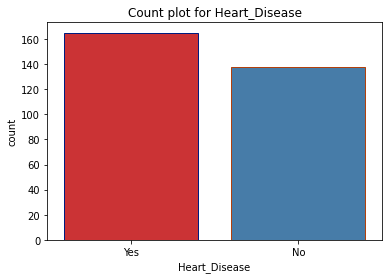

In [73]:
sns.countplot(x='Heart_Disease', data=data,palette="Set1",edgecolor=sns.color_palette("dark", 5)).set_title('Count plot for Heart_Disease')

- We have 165 people with heart disease and 138 people with no heart disease. So, our dataset is balanced!  

2. **Let's do the same for Gender Column**

In [74]:
gender = data['gender'].value_counts()
gender

Male      207
Female     96
Name: gender, dtype: int64

- We have 207 male and 96 female!

3. **Let's check how many male and female have heart disease? Also, check for non-heart disease people!** 

In [75]:
data.groupby(['gender','Heart_Disease','fbs'])['Heart_Disease'].count()

gender  Heart_Disease  fbs
Female  No             0      18
                       1       6
        Yes            0      66
                       1       6
Male    No             0      98
                       1      16
        Yes            0      76
                       1      17
Name: Heart_Disease, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Factor plot for Male and Female and Heart_Disease')

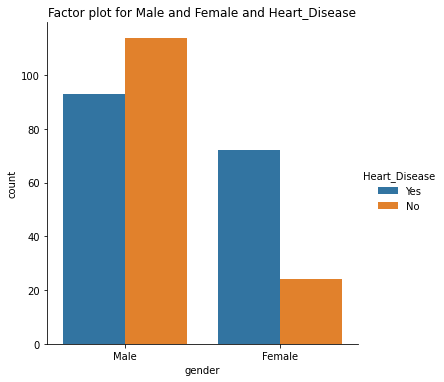

In [76]:
sns.factorplot('gender', hue='Heart_Disease', kind='count', data=data);
plt.title('Factor plot for Male and Female and Heart_Disease')

In [77]:
print(f"Female's heart disease : {round(data[data.sex == 0]['target'].sum()/data[data.sex == 0]['target'].count()*100)}%")
print(f"Male's heart disease : {round(data[data.sex == 1]['target'].sum()/data[data.sex == 1]['target'].count()*100)}%")

Female's heart disease : 75%
Male's heart disease : 45%


**So, 75 % Female has heart disease and 45% male has heart disease!**

**For female, this is really considerable situation which should be took care!**

### **CP (Chest Pain)**

- **0: Typical angina: chest pain related decrease blood supply to the heart**
- **1: Atypical angina: chest pain not related to heart**
- **2: Non-anginal pain: typically esophageal spasms (non heart related)**
- **3: Asymptomatic: chest pain not showing signs of disease**

In [78]:
cp = data['cp'].value_counts()
cp

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


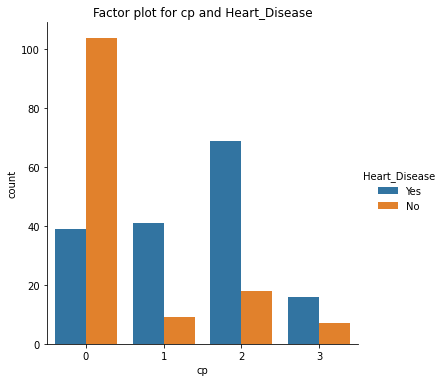

In [79]:
sns.factorplot('cp', hue='Heart_Disease', kind='count', data=data);
plt.title('Factor plot for cp and Heart_Disease')
plt.show()

In [80]:
print(f"CP value 0 heart disease : {round(data[data.cp == 0]['target'].sum()/data[data.cp == 0]['target'].count()*100)}%")
print(f"CP value 1 heart disease: {round(data[data.cp == 1]['target'].sum()/data[data.cp == 1]['target'].count()*100)}%")
print(f"CP value 2 heart disease : {round(data[data.cp == 2]['target'].sum()/data[data.cp == 2]['target'].count()*100)}%")
print(f"CP value 3 heart disease: {round(data[data.cp == 3]['target'].sum()/data[data.cp == 3]['target'].count()*100)}%")



CP value 0 heart disease : 27%
CP value 1 heart disease: 82%
CP value 2 heart disease : 79%
CP value 3 heart disease: 70%


- **People with CP(Chest pain) value 0 has less heart disease than people with CP value 1,2,3!**

### **restecg(resting electrocardiographic results)** :

- **0: Nothing to note**
- **1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat**
- **2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber**

In [81]:
restecg = data['restecg'].value_counts()
restecg

1    152
0    147
2      4
Name: restecg, dtype: int64

In [82]:
data.groupby(['restecg','Heart_Disease'])['Heart_Disease'].count()

restecg  Heart_Disease
0        No               79
         Yes              68
1        No               56
         Yes              96
2        No                3
         Yes               1
Name: Heart_Disease, dtype: int64

In [83]:
print(f"restecg value with 1 heart disease : {round(data[data.restecg == 1]['target'].sum()/data[data.restecg == 1]['target'].count()*100)}%")
print(f"restecg value with 0 heart disease : {round(data[data.restecg == 0]['target'].sum()/data[data.restecg == 0]['target'].count()*100)}%")

restecg value with 1 heart disease : 63%
restecg value with 0 heart disease : 46%


- **People with restecg(resting EKG results) value 1 has much more heart disease than people with restecg value 0!**

### **thal(thalium stress result) :**

In [84]:
thal = data['thal'].value_counts()
thal

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [85]:
data.groupby(['thal','Heart_Disease'])['Heart_Disease'].count()

thal  Heart_Disease
0     No                 1
      Yes                1
1     No                12
      Yes                6
2     No                36
      Yes              130
3     No                89
      Yes               28
Name: Heart_Disease, dtype: int64

In [86]:
print(f"thal value with 1 heart disease : {round(data[data.thal == 1]['target'].sum()/data[data.thal == 1]['target'].count()*100)}%")
print(f"thal value with 2 heart disease : {round(data[data.thal == 2]['target'].sum()/data[data.thal == 2]['target'].count()*100)}%")
print(f"thal value with 3 heart disease : {round(data[data.thal == 3]['target'].sum()/data[data.thal == 3]['target'].count()*100)}%")

thal value with 1 heart disease : 33%
thal value with 2 heart disease : 78%
thal value with 3 heart disease : 24%


- **People with thal(thalium stress result) value 2 have more heart disease than other values 1 & 3!**

### **fbs(fasting blood sugar) :**

**fasting blood sugar > 120 mg/dl)**

**(1 = true; 0 = false)**

--- **'>126' mg/dL signals diabetes**

In [87]:
fbs = data['fbs'].value_counts()
fbs

0    258
1     45
Name: fbs, dtype: int64

In [88]:
data.groupby(['fbs','Heart_Disease'])['Heart_Disease'].count()

fbs  Heart_Disease
0    No               116
     Yes              142
1    No                22
     Yes               23
Name: Heart_Disease, dtype: int64

In [89]:
print(f"fbs value with 1 heart disease : {round(data[data.fbs == 1]['target'].sum()/data[data.fbs == 1]['target'].count()*100)}%")
print(f"fbs value with 0 heart disease : {round(data[data.fbs == 0]['target'].sum()/data[data.fbs == 0]['target'].count()*100)}%")

fbs value with 1 heart disease : 51%
fbs value with 0 heart disease : 55%


- **So, it indicates that having "fasting blood sugar" can cause heart disease but people without fbs may have heart disease too!**

### **Slope** :

**the slope of the peak exercise ST segment**

--- **0: Upsloping: better heart rate with excercise (uncommon)**

--- **1: Flatsloping: minimal change (typical healthy heart)**

--- **2: Downslopins: signs of unhealthy heart**

In [90]:
data.groupby(['slope','Heart_Disease'])['Heart_Disease'].count()

slope  Heart_Disease
0      No                12
       Yes                9
1      No                91
       Yes               49
2      No                35
       Yes              107
Name: Heart_Disease, dtype: int64

In [91]:
print(f"slope value with 1 heart disease : {round(data[data.slope == 1]['target'].sum()/data[data.slope == 1]['target'].count()*100)}%")
print(f"slope value with 0 heart disease : {round(data[data.slope == 0]['target'].sum()/data[data.slope == 0]['target'].count()*100)}%")
print(f"slope value with 2 heart disease : {round(data[data.slope == 2]['target'].sum()/data[data.slope == 2]['target'].count()*100)}%")


slope value with 1 heart disease : 35%
slope value with 0 heart disease : 43%
slope value with 2 heart disease : 75%


- **Slope value 2 means you have critical heart! 75% people with slope value 2 are more likely to have heart disease than slope value with 0 & 1!**

### **exang (exercise induced angina)**

- **(1 = yes; 0 = no)**

In [92]:
data.groupby(['exang','Heart_Disease'])['Heart_Disease'].count()

exang  Heart_Disease
0      No                62
       Yes              142
1      No                76
       Yes               23
Name: Heart_Disease, dtype: int64

In [93]:
print(f"exang value with 0 heart disease : {round(data[data.exang == 0]['target'].sum()/data[data.exang == 0]['target'].count()*100)}%")
print(f"exang value with 1 heart disease : {round(data[data.exang == 1]['target'].sum()/data[data.exang == 1]['target'].count()*100)}%")

exang value with 0 heart disease : 70%
exang value with 1 heart disease : 23%


- **People without exercise (exang=0/No angina induced by exercise) have more heart disease than People with exercise (exang=0/ angina induced by exercise)**

### **ca - number of major vessels**

- **(0-3) colored by flourosopy**

--- **colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)**


In [94]:
data.groupby(['ca','Heart_Disease'])['Heart_Disease'].count()

ca  Heart_Disease
0   No                45
    Yes              130
1   No                44
    Yes               21
2   No                31
    Yes                7
3   No                17
    Yes                3
4   No                 1
    Yes                4
Name: Heart_Disease, dtype: int64

In [95]:
print(f"ca value with 0 heart disease : {round(data[data.ca == 0]['target'].sum()/data[data.ca == 0]['target'].count()*100)}%")
print(f"ca value with 1 heart disease : {round(data[data.ca == 1]['target'].sum()/data[data.ca == 1]['target'].count()*100)}%")
print(f"ca value with 2 heart disease : {round(data[data.ca == 2]['target'].sum()/data[data.ca == 2]['target'].count()*100)}%")

ca value with 0 heart disease : 74%
ca value with 1 heart disease : 32%
ca value with 2 heart disease : 18%


**The more blood movement, the better your heart is! So, people with ca value 0 are more likely to have heart disease than ca value 1,2,3,4!**

## **Summary:**

1. **sex** : Male has less heart attack trendency(45%) than Female(75%).
2. **cp** : People with cp value 1,2,3 are more likely to have heart disease than people with 0 cp value.
3. **fbs** : Having "fasting blood sugar" can cause heart disease but people without fbs may have heart disease too!
4. **ca** : The more blood movement, the better your heart is! So, people with ca value 0 are more likely to have heart disease than ca value 1,2,3,4!
5. **exang** : People without exercise (exang=0/No angina induced by exercise) have more heart disease than People with exercise (exang=0/ angina induced by exercise)
6. **slope** : Slope value 2 means you have critical heart! 75% people with slope value 2 are more likely to have heart disease than slope value with 0 & 1!
7. **thal** : People with thal(thalium stress result) value 2 have more heart disease than other values 1 & 3!
8. **restecg** : People with restecg(resting EKG results) value 1 has much more heart disease than people with restecg value 0!

## **Creating Model :**

In [96]:
categorical_column.remove('target')
dataset = pd.get_dummies(data, columns = categorical_column)

In [97]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,Heart_Disease,gender,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,Yes,Male,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,Yes,Male,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,Yes,Female,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,Yes,Male,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,Yes,Female,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


## **Standardaization**

In [98]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [99]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'Heart_Disease', 'gender', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2',
       'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1',
       'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
model = LogisticRegression()

In [103]:
xy=dataset.drop(['target','Heart_Disease','gender'],axis=1)
xy.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [104]:
yz = dataset['target']
yz.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [105]:
x_train,x_test,y_train,y_test = train_test_split(xy,yz, test_size=.3,stratify=yz, random_state=5)

In [106]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_pred= model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

### **ACCURACY**

In [108]:
(y_pred == y_test).values

array([ True,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [109]:
np.mean(y_pred == y_test)

0.8461538461538461

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
accuracy=confusion_matrix(y_test,y_pred)

In [112]:
accuracy

array([[35,  6],
       [ 8, 42]])

### **TRAINING ACCURACY**

In [113]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict(x_train)
accuracy = accuracy_score(y_train,y_train_predict)*100 
accuracy
print(f'The accuracy (using accuracy_score) on training_data of our model is {round(accuracy, 2)}%')

The accuracy (using accuracy_score) on training_data of our model is 88.21%


### **TESTING ACCURACY**

In [114]:
from sklearn.metrics import accuracy_score
y_test_predict =  model.predict(x_test)
accuracy_score = accuracy_score(y_test,y_test_predict)*100 
print(f'The accuracy on testing_data of our model is {round(accuracy_score, 2)}%')

The accuracy on testing_data of our model is 84.62%


**`This is nice accuracy you can say! Our model is predicting correctly!`**

### **CONFUSHION MATRIX**

In [115]:
from sklearn.metrics import classification_report
print(f'Here is our classification report : \n {classification_report(y_test,y_pred)}')

Here is our classification report : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



### **Creating Predictive Model :**

`Let's predict whether our input's person has heart disease or not!`

In [116]:
input_data = (0.952197,	0.763956,	-0.256334,	0.015443,	1.087338,	0,	1,	1,	1,	0,	1,	0	,0,	1	,0,	0,	0,	0,	1,	0,	0,	0,0,1,0,1,0,1,1,0)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

"""
z = np.array([

    [1, 2, 3, 4],
 
    [5, 6, 7, 8],
 
    [9, 10, 11, 12]])

z.shape == (3, 4)

New shape as (1,-1). i.e, row is 1, column unknown. we get result new shape as (1, 12)

z.reshape(1,-1)

array([[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])

('This upper code is for your understanding purpose!')
"""


if (prediction[0]==1):
  print("He/She has heart disease!")
else :
  print("He/She doesn't has heart disease!")

He/She doesn't has heart disease!


## **THANK YOU! HAAAVE AAAA GREAT DAY! HOPE YOU ENJOYED MY PROJECT AND UNDERSTAND ALL THE THINGS! PLEASE CONSIDER A UPVOTE IN KAGGLE.**

Here is the link of my **kaggle notebook** : [Notebook](https://www.kaggle.com/abhirup2000/heart-disease)


`You can also find this notebook in my github profile :`

**Github :** [Heart Disease Prediction](https://github.com/ImmatureAbhirup/Heart-Disease-Prediction-using-Machine-Learning)


FOR MORE UPCOMING PROJECT YOU CAN FOLLOW ME TOO!

